# Test Notebook to learn how to read in various tide gauge records

### Some sources of tide gauge data

https://www.psmsl.org/

http://www.ioc-sealevelmonitoring.org/

http://uhslc.soest.hawaii.edu/data/

### Load in some modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Specify directories and filenames
and other runtime options

In [3]:
dir_in = 'data'
file_in = 'd820.csv'
ext = 'csv'

In [7]:
%who

dir_in	 ext	 file_in	 np	 os	 pd	 plt	 


In [8]:
print(dir_in)

data/greenland


In [9]:
?pd.read_csv

In [11]:
filepath = os.path.join(dir_in, file_in)

### Basic `read_csv` to peek into the csv file

In [12]:
# df = pd.read_csv(os.path.join(dir_in, file_in))
df = pd.read_csv(filepath)

In [14]:
df

,2014,7,5,4577
0,2014,7,6,4531
1,2014,7,7,4584
2,2014,7,8,4606
3,2014,7,9,4532
4,2014,7,10,4493
...,...,...,...,...
2152,2020,5,27,4585
2153,2020,5,28,4518
2154,2020,5,29,4492
2155,2020,5,30,4483


In [15]:
df = pd.read_csv(os.path.join(dir_in, file_in), header=None)
df

,0,1,2,3
0,2014,7,5,4577
1,2014,7,6,4531
2,2014,7,7,4584
3,2014,7,8,4606
4,2014,7,9,4532
...,...,...,...,...
2153,2020,5,27,4585
2154,2020,5,28,4518
2155,2020,5,29,4492
2156,2020,5,30,4483


In [66]:
column_names=['YEAR', 'MONTH', 'DAY', 'Z'] 
df = pd.read_csv(os.path.join(dir_in, file_in), names=column_names)
df

,YEAR,MONTH,DAY,Z
0,2014,7,5,4577
1,2014,7,6,4531
2,2014,7,7,4584
3,2014,7,8,4606
4,2014,7,9,4532
...,...,...,...,...
2153,2020,5,27,4585
2154,2020,5,28,4518
2155,2020,5,29,4492
2156,2020,5,30,4483


### Check the dataframe we created

In [68]:
df.describe()

,YEAR,MONTH,DAY,Z
count,2158.000000,2158.000000,2158.000000,2158.000000
mean,2016.960612,6.528267,15.760426,1870.912882
std,1.753948,3.476244,8.794916,9571.266027
min,2014.000000,1.000000,1.000000,-32767.000000
25%,2015.000000,3.000000,8.000000,4421.250000
50%,2017.000000,7.000000,16.000000,4498.000000
75%,2018.000000,10.000000,23.000000,4569.750000
max,2020.000000,12.000000,31.000000,4982.000000


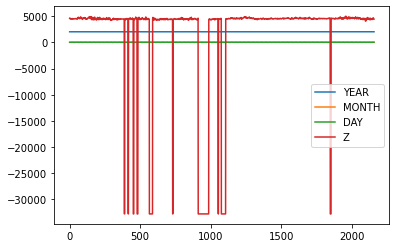

In [69]:
df.plot()

[  4577   4531   4584   4606   4532   4493   4490   4458   4442   4480
   4516   4487   4467   4477   4459   4450   4466   4522   4519   4502
   4515   4524   4457   4433   4454   4461   4451   4474   4498   4494
   4486   4492   4505   4521   4508   4481   4500   4489   4496   4547
   4545   4543   4513   4503   4419   4428   4448   4424   4666   4702
   4685   4599   4600   4776   4799   4670   4661   4645   4551   4602
   4620   4608   4558   4582   4650   4766   4821   4839   4665   4764
   4757   4641   4611   4596   4662   4703   4628   4374   4417   4453
   4482   4520   4578   4636   4656   4639   4610   4603   4623   4730
   4605   4573   4688   4617   4644   4595   4449   4402   4422   4537
   4504   4476   4425   4469   4535   4575   4559   4633   4642   4663
   4674   4660   4657   4678   4779   4876   4802   4911   4796   4671
   4746   4765   4463   4627   4909   4621   4594   4695   4314   4306
   4455   4390   4571   4767   4563   4517   4388   4332   4313   4362
   472

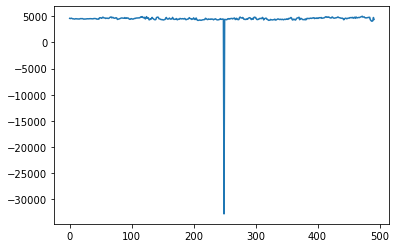

In [70]:
# df[['YEAR', 'Z']]
# df.YEAR.plot()

plt.plot(df['Z'].unique())

print(df['Z'].unique())

### set missing values to 'nan'

In [58]:
# df['Z'] = df['Z'].replace(-32767, np.nan)
df[df['Z'] > 4000]

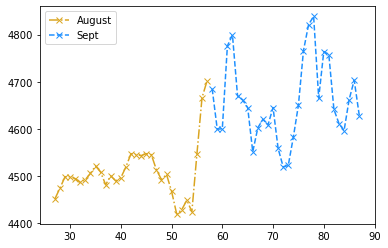

In [136]:
# df[(df['Z'] > 4000) & (df['Z'] <= 5000)]
# print(df[(df['MONTH'] == 8) & (df['YEAR'] == 2014)])

df[(df['MONTH'] == 8) & (df['YEAR'] == 2014)].Z.plot(marker='x', 
                                                     color='goldenrod', 
                                                     linestyle='-.', 
                                                     linewidth=1.5,
                                                    label='August')
df[(df['MONTH'] == 9) & (df['YEAR'] == 2014)].Z.plot(marker='x', 
                                                     color='dodgerblue', 
                                                     linestyle='--', 
                                                     linewidth=1.5,
                                                    label='Sept')
plt.legend()

In [141]:
df['Z2'] = df['Z'] + 50
df

,YEAR,MONTH,DAY,Z,Z2
0,2014,7,5,4577.0,4627.0
1,2014,7,6,4531.0,4581.0
2,2014,7,7,4584.0,4634.0
3,2014,7,8,4606.0,4656.0
4,2014,7,9,4532.0,4582.0
...,...,...,...,...,...
2153,2020,5,27,4585.0,4635.0
2154,2020,5,28,4518.0,4568.0
2155,2020,5,29,4492.0,4542.0
2156,2020,5,30,4483.0,4533.0


### create datetime column and set it to be the index

In [138]:
pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

0      2014-07-05
1      2014-07-06
2      2014-07-07
3      2014-07-08
4      2014-07-09
          ...    
2153   2020-05-27
2154   2020-05-28
2155   2020-05-29
2156   2020-05-30
2157   2020-05-31
Length: 2158, dtype: datetime64[ns]

In [144]:
df['DATETIME'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])
df

,YEAR,MONTH,DAY,Z,Z2,DATETIME
0,2014,7,5,4577.0,4627.0,2014-07-05
1,2014,7,6,4531.0,4581.0,2014-07-06
2,2014,7,7,4584.0,4634.0,2014-07-07
3,2014,7,8,4606.0,4656.0,2014-07-08
4,2014,7,9,4532.0,4582.0,2014-07-09
...,...,...,...,...,...,...
2153,2020,5,27,4585.0,4635.0,2020-05-27
2154,2020,5,28,4518.0,4568.0,2020-05-28
2155,2020,5,29,4492.0,4542.0,2020-05-29
2156,2020,5,30,4483.0,4533.0,2020-05-30


In [145]:
df = df.set_index('DATETIME')
df

,YEAR,MONTH,DAY,Z,Z2
DATETIME,,,,,
2014-07-05,2014,7,5,4577.0,4627.0
2014-07-06,2014,7,6,4531.0,4581.0
2014-07-07,2014,7,7,4584.0,4634.0
2014-07-08,2014,7,8,4606.0,4656.0
2014-07-09,2014,7,9,4532.0,4582.0
...,...,...,...,...,...
2020-05-27,2020,5,27,4585.0,4635.0
2020-05-28,2020,5,28,4518.0,4568.0
2020-05-29,2020,5,29,4492.0,4542.0


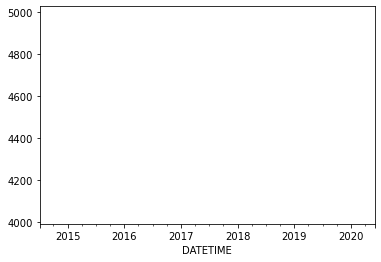

In [163]:
ax = df['Z'].plot(linestyle='')

### Zoom in using `set_xlim`

(4300.0, 4600.0)

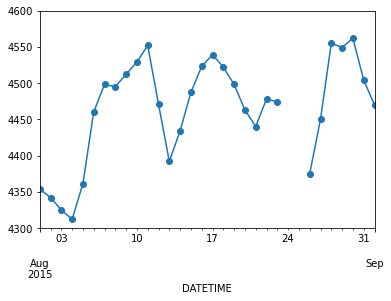

In [162]:
ax = df['Z'].plot(marker='o')
ax.set_xlim(pd.Timestamp('2015-08-01'), pd.Timestamp('2015-09-01'))
ax.set_ylim(4300, 4600)